In [1]:
from IPython.display import display, HTML

html_code = """
<style>
    /* Contenedor principal con fondo del logo */
    .header-container {
        position: relative;
        background-image: url('https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg');
        background-size: contain;
        background-repeat: no-repeat;
        background-position: center;
        text-align: center;
        padding: 100px 40px;
        background-color: rgba(0, 0, 0, 0.7); /* Fondo oscuro semitransparente */
        border-radius: 10px;
    }

    /* Estilos del texto */
    .header-title {
        font-size: 32px;
        font-weight: bold;
        color: white;
    }

    .header-subtitle {
        font-size: 24px;
        font-weight: bold;
        color: white;
    }

    .header-info {
        font-size: 18px;
        font-weight: normal;
        color: white;
    }
</style>

<div class="header-container">
    <div class="header-title">📌 Fundamentos de Programación - 2025-I</div>
    <div class="header-subtitle">📊 Trabajo Final: Dólar Histórico en Colombia (1991-2024)</div>
    <br>
    <div class="header-info"><strong>👨‍🏫 Docente:</strong> Tomás Atheortua</div>
    <br>
    <div class="header-info">
        <strong>👨‍🎓 Alumnos:</strong> <br>
        1️⃣ Sergio Alejandro Laverde Peña (CC 1.152.217.871) <br>
        2️⃣ Jhon Alejandro Jaramillo Echeverri (CC 1.035.422.452) <br>
        3️⃣ Juan Andrés Ruiz Ramírez (CC 1.121.712.506)
    </div>
</div>
"""

display(HTML(html_code))


<h2>Librerías necesarias:</h2>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pychow import ChowTest

<hr>

<h2>Importación de los datos:</h2>
<p>
    <ul>
        <li>Fuente: Superintendencia Financiera de Colombia</li>
        <li>Tema: Tasa de Cambio Representativa del Mercado - TRM</li>
        <li>Link: <a href=https://www.superfinanciera.gov.co/publicaciones/60819/informes-y-cifrascifrasestablecimientos-de-creditoinformacion-periodicadiariatasa-de-cambio-representativa-del-mercado-trm-60819/>https://www.superfinanciera.gov.co/publicaciones/60819/informes-y-cifrascifrasestablecimientos-de-creditoinformacion-periodicadiariatasa-de-cambio-representativa-del-mercado-trm-60819/</a></li>
    </ul>
</p>
<hr>

In [3]:
data = pd.read_csv('./Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          7976 non-null   float64
 1   UNIDAD         7976 non-null   object 
 2   VIGENCIADESDE  7976 non-null   object 
 3   VIGENCIAHASTA  7976 non-null   object 
dtypes: float64(1), object(3)
memory usage: 249.4+ KB


<hr>

## ¿Sabías que...?
### Cuando un día es sábado, domingo o festivo en Colombia, a tasa oficial (TRM) seguirá siendo la calculada en el último día que operó el mercado, y tendrá vigencia hasta el día siguiente.

<p><img src="TRM_Calendario.png" style="width: 80%; height: auto;"></p>
<hr>


In [4]:
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4100.66,COP,15/02/2025,18/02/2025
1,4161.46,COP,14/02/2025,14/02/2025
2,4165.07,COP,13/02/2025,13/02/2025
3,4153.80,COP,12/02/2025,12/02/2025
4,4132.93,COP,11/02/2025,11/02/2025
5,4113.70,COP,08/02/2025,10/02/2025
6,4150.99,COP,07/02/2025,07/02/2025
7,4180.06,COP,06/02/2025,06/02/2025
8,4153.54,COP,05/02/2025,05/02/2025
9,4198.66,COP,04/02/2025,04/02/2025


<hr>

<h2>Estructuración de los datos</h1>
<h3>Reto: Completar todos los días con su respectiva TRM</h2>

<hr>

In [5]:
#Convierte VIGENCIADESDE en dato tipo Datetime, reemplaza indice numerico con fechas
data.index = pd.to_datetime((data['VIGENCIADESDE']), format='%d/%m/%Y')
#Ordena DF según indice, ascendente y modificando el DF directamente
data.sort_index(ascending=True, inplace=True) 
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
VIGENCIADESDE,,,,
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991
1991-12-12,633.09,COP,12/12/1991,12/12/1991


In [6]:
full_dates = pd.date_range(min(data.index), max(data.index)) # Se crea fechas intermedias, incluso las que no estaban
data = data.reindex(full_dates) #Cambia el índice del DataFrame para que incluya todas las fechas en full_dates.
data.head(15)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,NaN,NaN,NaN,NaN
1991-12-09,NaN,NaN,NaN,NaN
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


<hr>
<h2>Calendario de diciembre de 1991</h2>
<p><img src="Calendario_1991.png" style="width: 20%; display: block; margin: auto;"></p>
<hr>


In [7]:
data.ffill(inplace=True) # Rellena los valores faltantes (NaN) con el último valor disponible.
data.head(15)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,638.06,COP,07/12/1991,09/12/1991
1991-12-09,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


<hr>
<h2>Visualización historica TRM</h2>
<hr>

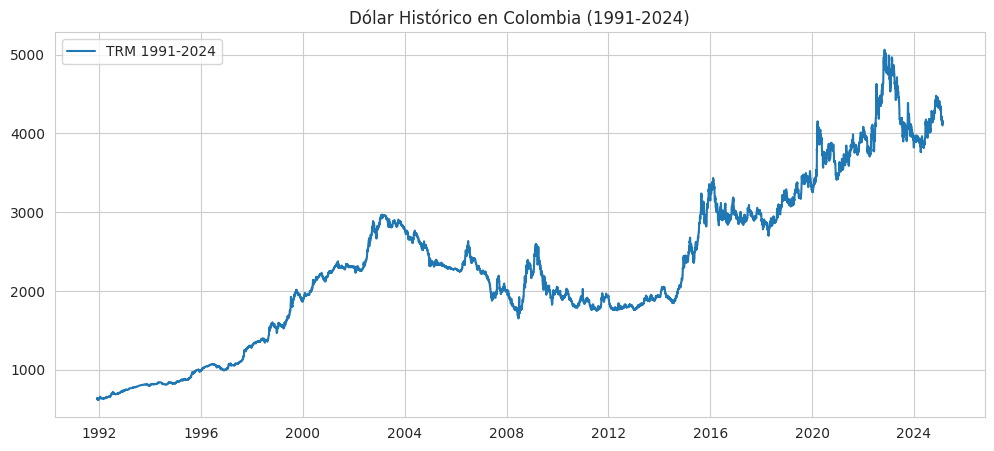

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.title("Dólar Histórico en Colombia (1991-2024)")
sns.lineplot(
    label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index,
).set(xlabel = None, ylabel = None);

<hr>
<h2>Acontecimientos Historicos</h2>

<hr>


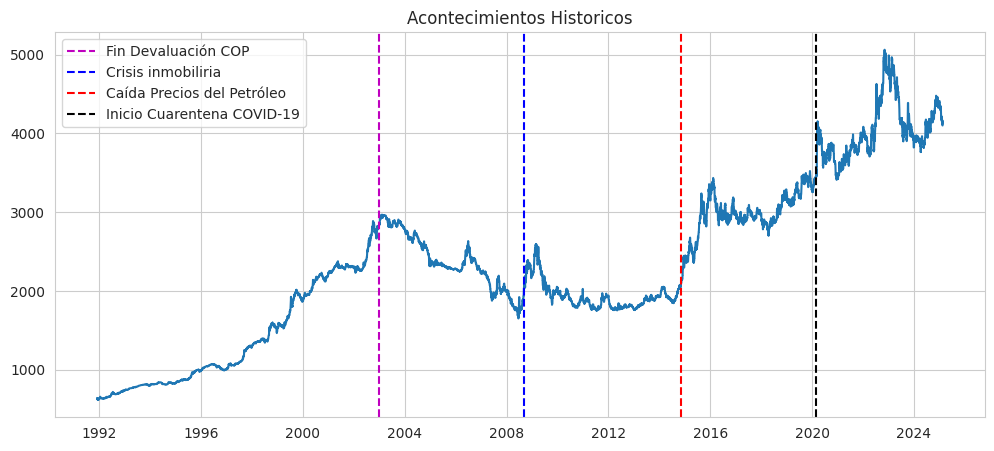

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
).set(xlabel = None, ylabel = None)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Historicos")
plt.axvline(x=pd.Timestamp("2003-01-01"), color="m", linestyle="--", label="Fin Devaluación COP")
plt.axvline(x=pd.Timestamp("2008-09-01"), color="b", linestyle="--", label="Crisis inmobiliria")
plt.axvline(x=pd.Timestamp("2014-11-01"), color="r", linestyle="--", label="Caída Precios del Petróleo")
plt.axvline(x=pd.Timestamp("2020-03-01"), color="k", linestyle="--", label="Inicio Cuarentena COVID-19")

# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show();

<hr>
<h2>¿Alguna relación política?</h2>
<hr>

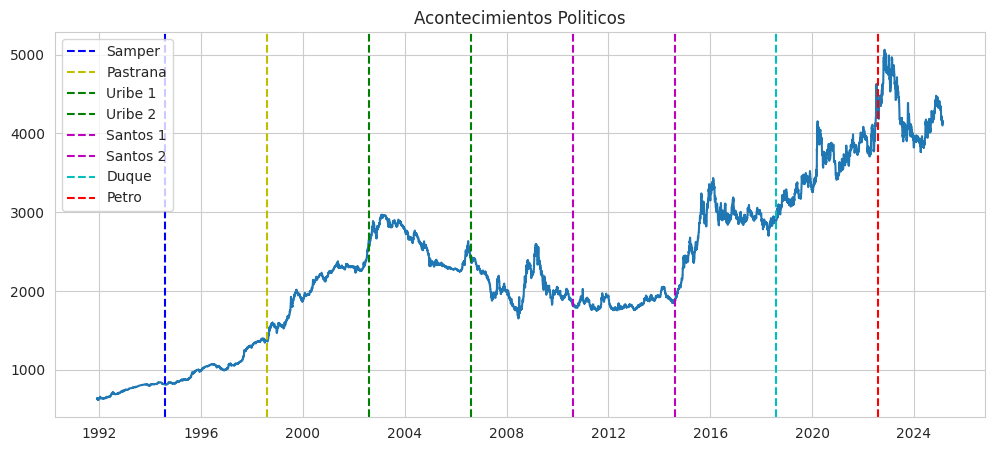

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
).set(xlabel = None, ylabel = None)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Politicos")
plt.axvline(x=pd.Timestamp("1994-08-07"), color="b", linestyle="--", label = "Samper")
plt.axvline(x=pd.Timestamp("1998-08-07"), color="y", linestyle="--", label = "Pastrana")
plt.axvline(x=pd.Timestamp("2002-08-07"), color="g", linestyle="--", label = "Uribe 1")
plt.axvline(x=pd.Timestamp("2006-08-07"), color="g", linestyle="--", label = "Uribe 2")
plt.axvline(x=pd.Timestamp("2010-08-07"), color="m", linestyle="--", label = "Santos 1")
plt.axvline(x=pd.Timestamp("2014-08-07"), color="m", linestyle="--", label = "Santos 2")
plt.axvline(x=pd.Timestamp("2018-08-07"), color="c", linestyle="--", label = "Duque")
plt.axvline(x=pd.Timestamp("2022-08-07"), color="r", linestyle="--", label = "Petro")

# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show();

# Análisis gráfico exploratorio por segmentos (diagramas de caja y bigotes con gráfico de barras)
#### En esta parte calcularemos la media y sacaremos la diferencia entre los periodos: 
* Nueva Constitución: 1993-01-31 - 2003-12-31
* Pre-Crisis: 2003-01-01 - 2009-12-31
* Post-Crisis: 2009-01-01 - 2015-12-31
* Petróleo: 2015-01-01 - 2020-12-31
* COVID: 2020-01-01 - 2024-12-31

####  Hacemos resample para que las diferencias tengan menos ruido y le asignamos la media a la columna "VALOR"

In [11]:
# remuestreo (resampling) de una serie temporal en un DataFrame, agrupando los datos por mes ('ME') y agregando
# los valores por su media.
resampled = data['VALOR'].resample('ME').agg({
        "VALOR": "mean"
})
resampled.head()

,VALOR
1991-12-31,629.979000
1992-01-31,644.058065
1992-02-29,635.671724
1992-03-31,640.501935
1992-04-30,649.955000


#### Calculamos la diferencia entre el valor actual y el valor anterior (variación mensual)

In [12]:
diferencias = resampled.diff()
diferencias.head()

,VALOR
1991-12-31,NaN
1992-01-31,14.079065
1992-02-29,-8.386340
1992-03-31,4.830211
1992-04-30,9.453065


#### Cálculo de diferencias por periodo (Variaciones entre periodos)

In [13]:
periods = {
    "1993-2002": data.loc['20021231','VALOR'] - data.loc['19930131','VALOR'],
    "2003-2008": data.loc['20080831','VALOR'] - data.loc['20030131','VALOR'],
    "2008-2014": data.loc['20141031','VALOR'] - data.loc['20080930','VALOR'],
    "2014-2020": data.loc['20200229','VALOR'] - data.loc['20141130','VALOR'],
    "2020-2025": data.loc['20250131','VALOR'] - data.loc['20200331','VALOR'],
}

# Mostrar resultados sin error de formato
for period, diff in periods.items():
    print(f"Diferencia entre {period}: {diff:>7.2f}")

Diferencia entre 1993-2002: 2118.74
Diferencia entre 2003-2008: -994.26
Diferencia entre 2008-2014: -124.10
Diferencia entre 2014-2020: 1333.67
Diferencia entre 2020-2025:  105.20


#### Almacenamos en un diccionario las diferencias de la TRM

In [14]:
period_ranges = {
    "Nueva Const": ('1993-01-31', '2003-12-31'),
    "Pre-Crisis": ('2003-01-01', '2009-12-31'),
    "Post-Crisis": ('2009-01-01', '2015-12-31'),
    "Petroleo": ('2015-01-01', '2020-12-31'),
    "COVID": ('2020-01-01', '2024-12-31'),
}

diccionario = {}
for key, value in period_ranges.items():
    date_init = pd.to_datetime(value[0])
    date_end = pd.to_datetime(value[1])
    
    diccionario[key] = diferencias.loc[date_init:date_end,'VALOR']

#### Convertimos el DataFrame para graficar

In [15]:
# Convertir a DataFrame para graficar
df_list = []

for key, value in diccionario.items():
    df = value.to_frame()
    df["PERIODO"] = key
    df_list.append(df)

plot_df = pd.concat(df_list, axis=0)
plot_df

,VALOR,PERIODO
1993-01-31,11.353226,Nueva Const
1993-02-28,4.549205,Nueva Const
1993-03-31,14.968537,Nueva Const
1993-04-30,6.771677,Nueva Const
1993-05-31,7.973806,Nueva Const
...,...,...
2024-08-31,28.624516,COVID
2024-09-30,116.965882,COVID
2024-10-31,66.957667,COVID
2024-11-30,159.182333,COVID


### Diagrama de cajas

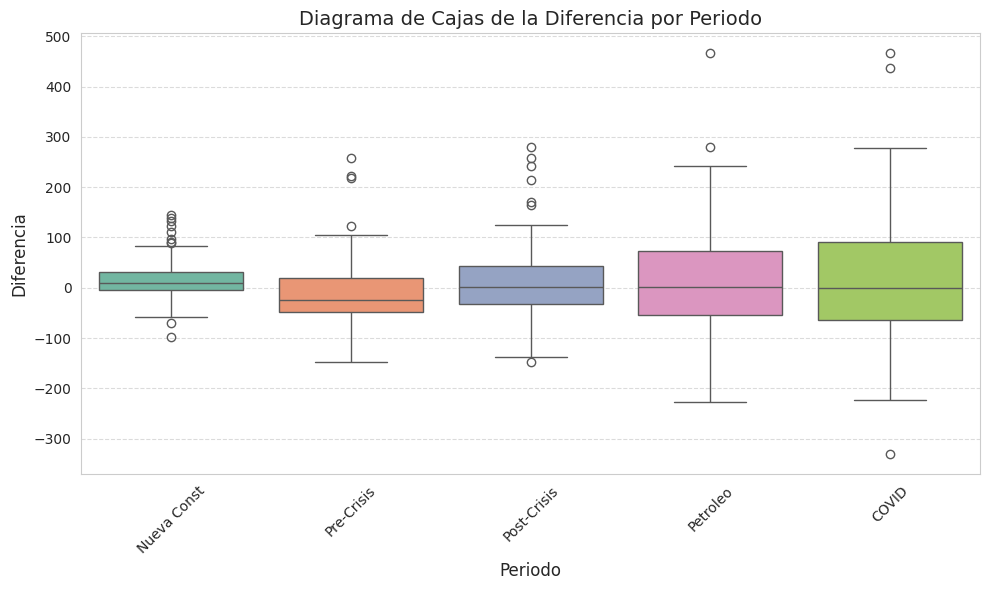

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=plot_df, x='PERIODO', y='VALOR', hue='PERIODO', palette='Set2', legend=False)

# Personalización del gráfico
plt.title('Diagrama de Cajas de la Diferencia por Periodo', fontsize=14)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Diferencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()

### Gráfico de barras

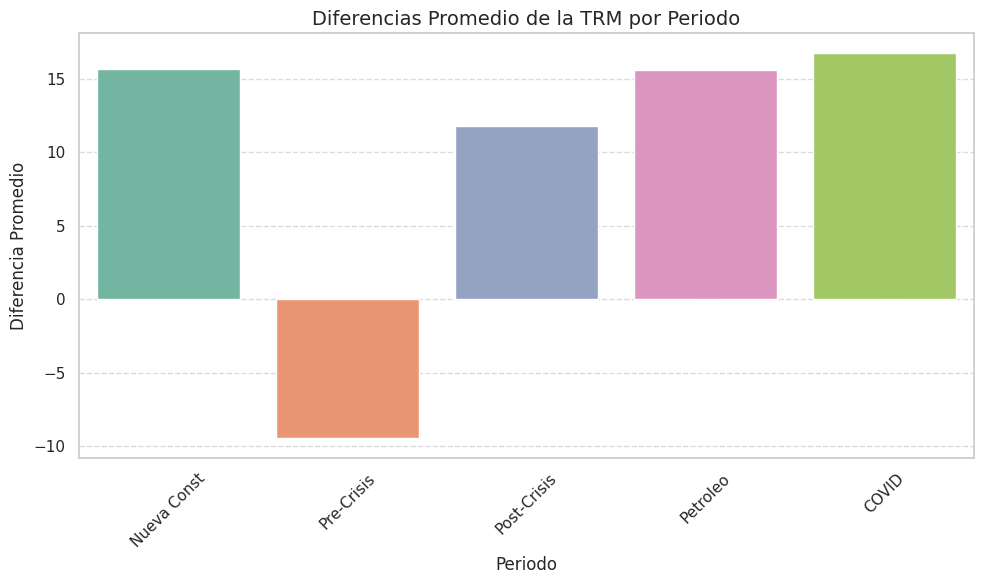

In [17]:
# 🎨 Configuración de estilo
sns.set(style="whitegrid")

# 📊 Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x='PERIODO',
    y='VALOR',
    hue='PERIODO',       # Asignación de colores a través de hue
    palette='Set2',      # Colores consistentes
    errorbar=None,       # Reemplaza ci=None
    dodge=False,
    legend=False         # Evita mostrar la leyenda si no es necesaria
)

# Personalización del gráfico
plt.title('Diferencias Promedio de la TRM por Periodo', fontsize=14)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Diferencia Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<hr>
<h2>Planteamiento de las hipótesis</h2>
<p>
    <ol>
        <li>Hay un cambio estructural en la TRM tras la  estabilización de la política monetaria alrededor del 2003</li>
        <li>No hay cambio estructural alguno alrededor de la crisis inmobiliaria del 2008</li>
        <li>Hay un cambio estructural tras la caída de los precios del petróleo alrededor del 2015</li>
    </ol>
</p>
<hr>

<h2>La prueba de Chow</h2>
<p>La prueba de Chow, originalmente planteada en un paper de 1960, es una prueba para determinar si en una serie de tiempo hay un cambio estructural.</p>
<p>$$
F = \frac{(RSS_\text{combined} - (RSS_1 + RSS_2)) / k}{(RSS_1 + RSS_2) / (N_1 + N_2 - 2k)}
$$</p>
<hr>

<h3>La estabilización de la política monetaria</h3>
<p>Planteamos la hipótesis alternativa de que hay un quiebre estructural en 2003-01-01 contra la hipótesis nula de que la serie no tiene cambios estructurales.</p>
<p>Para probar las hipótesis una a la vez trabajaremos solo sobre el periódo hasta cierre de 2014.</p>
<hr>

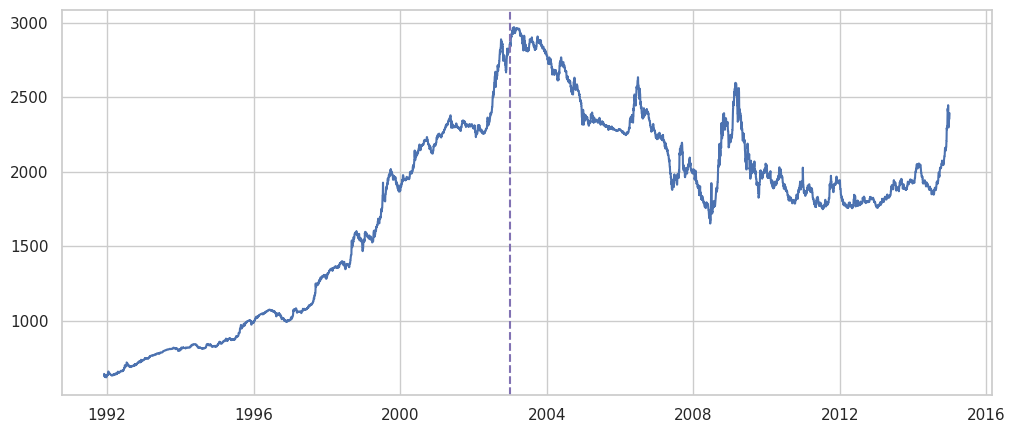

In [18]:
hip1 = data.loc[:"2014-12-31",["VALOR"]]
hip1.loc[:,"POSICION"] = np.arange(1, hip1.shape[0]+1)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = hip1['VALOR'],
    x = hip1.index
).set(xlabel = None, ylabel = None)
plt.axvline(x=pd.Timestamp("2003-01-01"), color="m", linestyle="--", label="Fin Devaluación COP");

In [19]:
pos1 = hip1.loc["2003-01-01", "POSICION"].item()
result = ChowTest.chow_test(data=hip1, breakpoint=int(pos1), dependent_var="VALOR", independent_vars=["POSICION"])
print(f"Estatístico P = {result['Chow Test Statistic']:.2f}\nValor P       = {result['P-value']:.2g}")

Estatístico P = 24812.12
Valor P       = 1.1e-16


<hr>
<p>Dado que el valor P es inferior a 0.05, rechazamos la hipótesis nula a favor de nuestra hipótesis alternativa.</p>
<p>Concluímos que la estabilización de la política monetaria coincide con un cambio en la tendencia de la TRM.</p>
<hr>
<h3>La crisis inmobiliaria</h3>
<p>Planteamos la hipótesis alternativa de que la crsis inmobiliaria coincide con un cambio en la tendencia de la TRM contra la hipótesis nula de que no lo hace.</p>
<p>En este caso, trabajamos en el período "valle" entre los dos picos de la TRM, y queremos no rechazar la hipótesis nula.</p>
<hr>

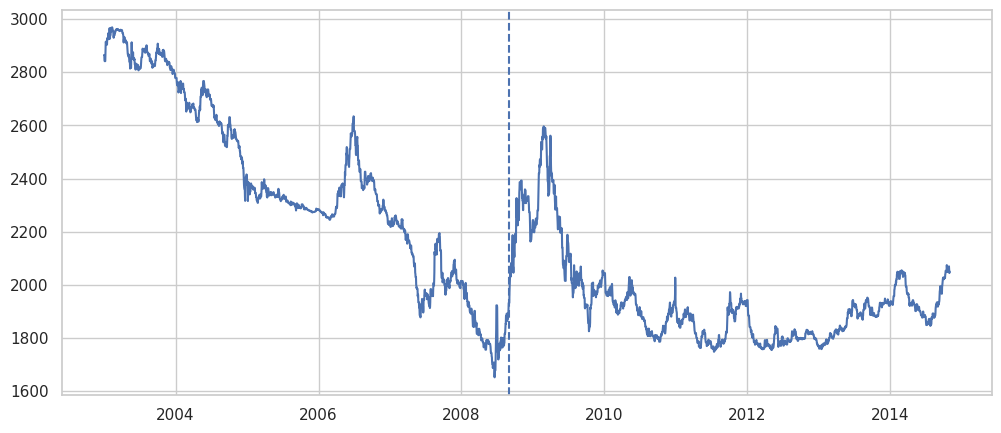

In [20]:
hip2 = data.loc["2003-01-01":"2014-10-31",["VALOR"]]
hip2.loc[:,"POSICION"] = np.arange(1, hip2.shape[0]+1)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = hip2['VALOR'],
    x = hip2.index
).set(xlabel = None, ylabel = None)
plt.axvline(x=pd.Timestamp("2008-09-01"), color="b", linestyle="--", label="Crisis inmobiliria");

In [21]:
pos2 = hip2.loc["2008-09-01", "POSICION"].item()
result = ChowTest.chow_test(data=hip2, breakpoint=int(pos2), dependent_var="VALOR", independent_vars=["POSICION"])
print(f"Estatístico P = {result['Chow Test Statistic']:.2f}\nValor P       = {result['P-value']:.2g}")

Estatístico P = 2543.64
Valor P       = 1.1e-16


<hr>
<p>Dado que el valor P es inferior a 0.05 debemos rechazar nuestra hipótesis nula a favor de la hipótesis alternativa</p>
<p>Se concluye que la crisis inmobiliaria coincide con un cambio en la tendencia de la TRM</p>
<hr>
<h3>La caída de los precios del petróleo</h3>
<p>Se plantea la hipótesis alternativa de que hay un cambio estructural en 2015-01-01 contra la hipótesis nula de que no lo hay.</p>
<p>Como ya sabemos que hay un cambio estructural en 2008-09-01 tomamos el período desde esa fecha hasta el presente.</p>
<hr>

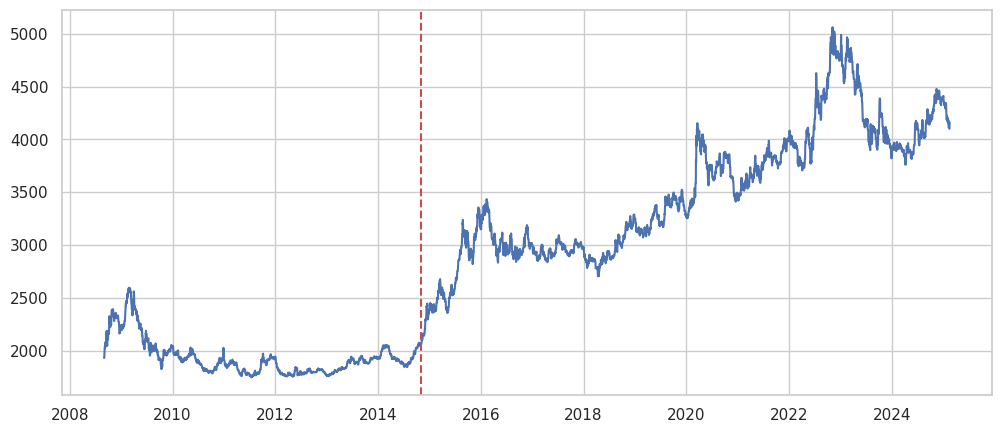

In [22]:
hip3 = data.loc["2008-09-01":,["VALOR"]]
hip3.loc[:,"POSICION"] = np.arange(1, hip3.shape[0]+1)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = hip3['VALOR'],
    x = hip3.index
).set(xlabel = None, ylabel = None)
plt.axvline(x=pd.Timestamp("2014-11-01"), color="r", linestyle="--", label="Caída Precios del Petróleo");

In [23]:
pos3 = hip3.loc["2014-11-01", "POSICION"].item()
result = ChowTest.chow_test(data=hip3, breakpoint=int(pos3), dependent_var="VALOR", independent_vars=["POSICION"])
print(f"Estatístico P = {result['Chow Test Statistic']:.2f}\nValor P       = {result['P-value']:.2g}")

Estatístico P = 3349.67
Valor P       = 1.1e-16


<hr>
<p>Dado que el valor P es inferior a 0.05, rechazamos la hipótesis nula a favor de nuestra hipótesis alternativa.</p>
<p>Concluimos que la caída de los precios del petróleo coincide con un cambio en la tendencia de la TRM</p>
<hr>
<h2>Conclusiones</h2>
<p>
    <ul>
        <li>Agrupación de procesos repetidos: Crear funciones para la selección de periodos, cálculo de diferencias y generación de gráficos puede reducir la redundancia.</li>
        <li>A simple vista el ciclo político no parece tener impactos inmediatos sobre la TRM.</li>
        <li>En su lugar, los cambios más grandes en la TRM coinciden con cambios en la política monetaria y la balanza comercial.</li>
        <li>Una interesante mejora que se puede introducir es examinar la correlación entre TRM, inflación, y balanza comercial.</li>
        <li>La implementación de la prueba Chow empleada es demasiado sensible. Una revisión del código fuente de la librería muestra que se emplean MCO.</li>
        <li>Una posibilidad de mejora es explorar usando otras regresiones que brinden un mejor ajuste, como los modelos ARMA o ARIMA.</li>
    </ul>
</p>